In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
print('✔ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
train.head()

✔ Dataset Imported Successfully!

It contains 891 rows and 12 columns.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('✔ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(test.shape[0], test.shape[1]))
test.head()

✔ Dataset Imported Successfully!

It contains 418 rows and 11 columns.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ***EDA***

In [7]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

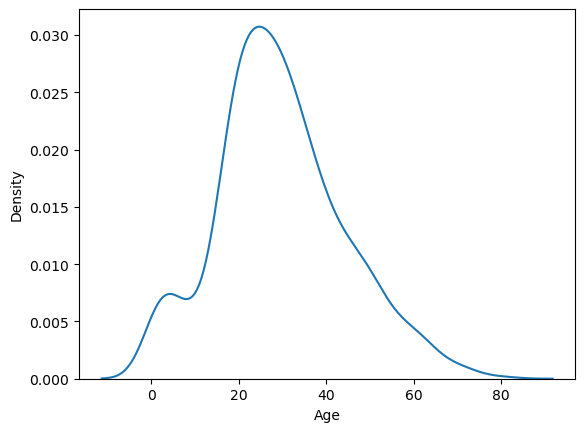

In [10]:
sns.distplot(train['Age'],hist=False)

In [11]:
if 'Cabin' in train.columns:
    train['hasCabin'] = train['Cabin'].notnull().astype('int')
    train.drop(columns=['Cabin'],inplace=True)
train.sample(10)
if 'Cabin' in test.columns:
    test['hasCabin'] = test['Cabin'].notnull().astype('int')
    test.drop(columns=['Cabin'],inplace=True)
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabin
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,S,0
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,Q,0
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,S,0
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,0
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,S,0
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,S,0
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,S,0
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,Q,0


In [12]:
train[['hasCabin','Survived']].groupby('hasCabin').mean()

,Survived
hasCabin,
0,0.299854
1,0.666667


<AxesSubplot:>

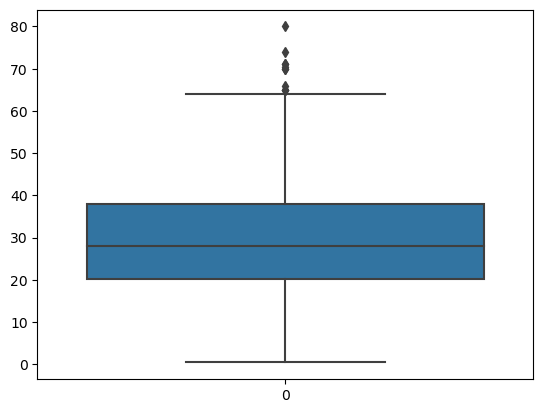

In [13]:
sns.boxplot(train['Age'])

In [14]:
train[train['Age']>75]['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Age', ylabel='Density'>

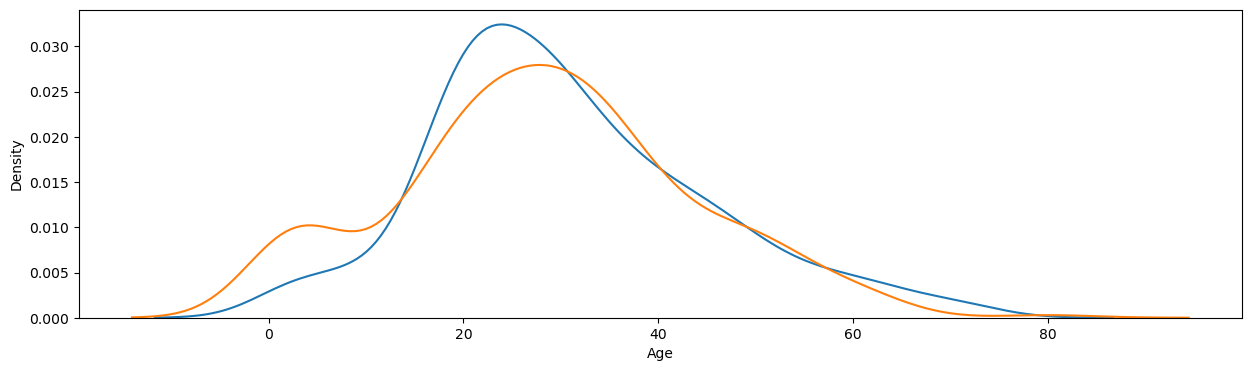

In [15]:
plt.subplots(figsize=(15,4))
sns.distplot(train[train['Survived']==0]['Age'],hist=False)
sns.distplot(train[train['Survived']==1]['Age'],hist=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

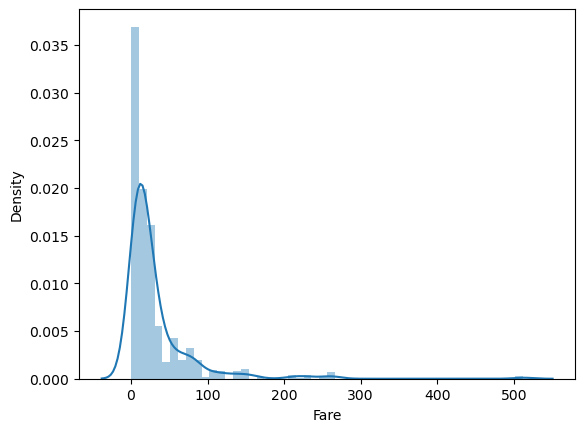

In [16]:
sns.distplot(train['Fare'])

<AxesSubplot:>

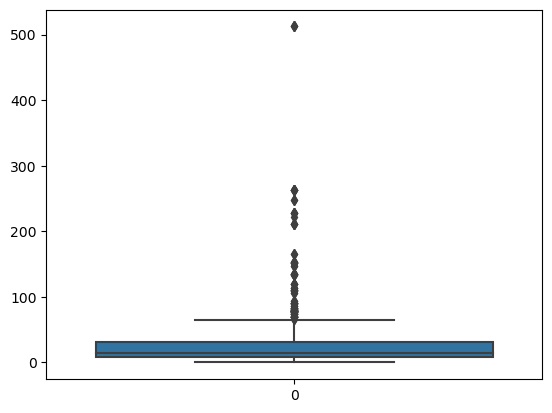

In [17]:
sns.boxplot(train['Fare'])

In [18]:
train[train['Fare']>400]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Fare', ylabel='Density'>

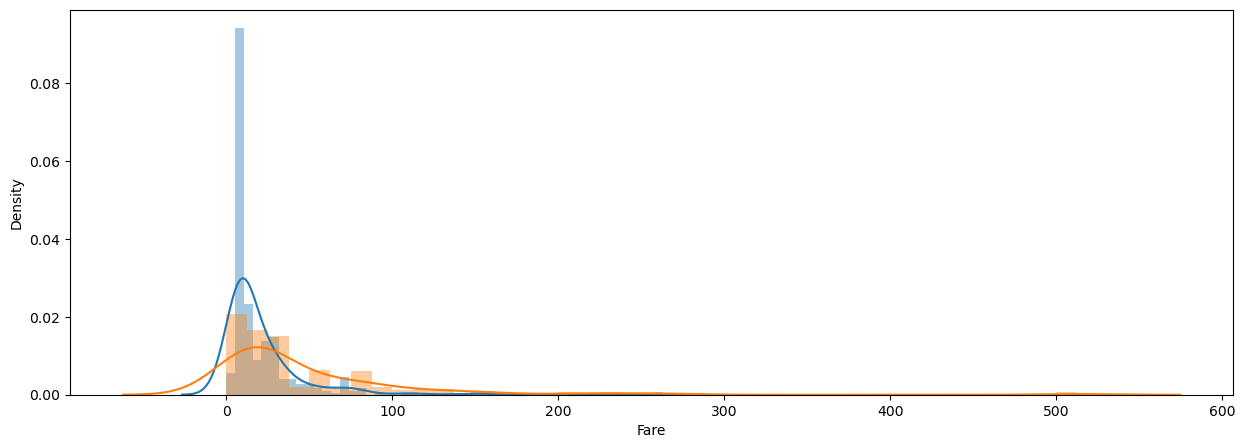

In [19]:
plt.subplots(figsize=(15,5))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [20]:
train['Embarked'].fillna('S',inplace=True)

In [21]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [22]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [23]:
train['Age'][np.isnan(train['Age'])]=gen_age

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [25]:
test['Age'][np.isnan(test['Age'])]=gen_age1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
PassengerId = test['PassengerId']
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True) 

In [27]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [28]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [29]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [30]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [31]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [32]:
family_size(5)

'Large'

In [33]:
train['family_size']=train['family'].apply(family_size)

In [34]:
test['family_size']=test['family'].apply(family_size)

In [35]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [36]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,hasCabin,family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Alone


In [37]:
y=train['Survived'].values

In [38]:
# group by title on name column
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=True)
print(train.Title.value_counts())
mapping_title = train.Title.unique()
mapping_title

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [39]:
# group by title on name column
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=True)
print(test.Title.value_counts())
mapping_title = test.Title.unique()
mapping_title

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [40]:
def titlee(name):
    if name=='Mr':
        return "Mr"
    elif name=='Miss':
        return "Miss"
    elif name=='Mrs':
        return "Mrs"
    elif name=='Master':
        return "Master"
    else:
        return "Rare"

In [41]:
train['titlee']=train['Title'].apply(titlee)
train.sample(100)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,hasCabin,family_size,Title,titlee
515,0,1,"Walker, Mr. William Anderson",male,47.0,36967,34.0208,S,1,Alone,Mr,Mr
593,0,3,"Bourke, Miss. Mary",female,34.0,364848,7.7500,Q,0,Small,Miss,Miss
651,1,2,"Doling, Miss. Elsie",female,18.0,231919,23.0000,S,0,Small,Miss,Miss
793,0,1,"Hoyt, Mr. William Fisher",male,37.0,PC 17600,30.6958,C,0,Alone,Mr,Mr
123,1,2,"Webber, Miss. Susan",female,32.5,27267,13.0000,S,1,Alone,Miss,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,0,Small,Mrs,Mrs
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,2667,7.2250,C,0,Alone,Miss,Miss
705,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,250655,26.0000,S,0,Alone,Mr,Mr
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,113781,151.5500,S,1,Small,Mrs,Mrs


In [42]:
test['titlee']=test['Title'].apply(titlee)
test.sample(100)

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,hasCabin,family_size,Title,titlee
336,2,"de Brito, Mr. Jose Joaquim",male,32.0,244360,13.0000,S,0,Alone,Mr,Mr
34,1,"Mock, Mr. Philipp Edmund",male,30.0,13236,57.7500,C,1,Small,Mr,Mr
359,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,349910,15.5500,S,0,Small,Mrs,Mrs
189,2,"Veal, Mr. James",male,40.0,28221,13.0000,S,0,Alone,Mr,Mr
390,1,"Payne, Mr. Vivian Ponsonby",male,23.0,12749,93.5000,S,1,Alone,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...
316,1,"Spencer, Mr. William Augustus",male,57.0,PC 17569,146.5208,C,1,Small,Mr,Mr
25,3,"Robins, Mr. Alexander A",male,50.0,A/5. 3337,14.5000,S,0,Small,Mr,Mr
369,2,"Pallas y Castello, Mr. Emilio",male,29.0,SC/PARIS 2147,13.8583,C,0,Alone,Mr,Mr
230,2,"Sweet, Mr. George Frederick",male,14.0,220845,65.0000,S,0,Alone,Mr,Mr


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   hasCabin     891 non-null    int64  
 9   family_size  891 non-null    object 
 10  Title        891 non-null    object 
 11  titlee       891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [44]:
train.drop(columns=['Name','Title','Ticket'],inplace=True)
test.drop(columns=['Name','Title','Ticket'],inplace=True)

In [45]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [46]:
train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size','titlee'], drop_first=True)
test=pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size','titlee'], drop_first=True)

In [47]:
train['Age'] = train['Age'].astype(int)
train['Fare'] = train['Fare'].astype(int)
test['Age'] = test['Age'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           891 non-null    int64
 1   Age                891 non-null    int64
 2   Fare               891 non-null    int64
 3   hasCabin           891 non-null    int64
 4   Pclass_2           891 non-null    uint8
 5   Pclass_3           891 non-null    uint8
 6   Sex_male           891 non-null    uint8
 7   Embarked_Q         891 non-null    uint8
 8   Embarked_S         891 non-null    uint8
 9   family_size_Large  891 non-null    uint8
 10  family_size_Small  891 non-null    uint8
 11  titlee_Miss        891 non-null    uint8
 12  titlee_Mr          891 non-null    uint8
 13  titlee_Mrs         891 non-null    uint8
 14  titlee_Rare        891 non-null    uint8
dtypes: int64(4), uint8(11)
memory usage: 37.5 KB


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                418 non-null    int64
 1   Fare               418 non-null    int64
 2   hasCabin           418 non-null    int64
 3   Pclass_2           418 non-null    uint8
 4   Pclass_3           418 non-null    uint8
 5   Sex_male           418 non-null    uint8
 6   Embarked_Q         418 non-null    uint8
 7   Embarked_S         418 non-null    uint8
 8   family_size_Large  418 non-null    uint8
 9   family_size_Small  418 non-null    uint8
 10  titlee_Miss        418 non-null    uint8
 11  titlee_Mr          418 non-null    uint8
 12  titlee_Mrs         418 non-null    uint8
 13  titlee_Rare        418 non-null    uint8
dtypes: int64(3), uint8(11)
memory usage: 14.4 KB


In [50]:
print(train.shape)
print(test.shape)

(891, 15)
(418, 14)


In [51]:
labels = train['Survived']
train.drop(columns=['Survived'],inplace=True)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train,labels,test_size=0.2)

In [53]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [54]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [55]:
rf = RandomForestClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [57]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120; total time=   0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [58]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.5,
 'n_estimators': 60}

In [59]:
rf_grid.best_score_

0.8412685905643652

In [60]:
yf=rf_grid.predict(test)
yf

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [61]:
submission=pd.DataFrame()

In [62]:
submission['PassengerId']=PassengerId
submission['Survived']=yf

In [63]:
submission.to_csv('submission.csv', index=False)